In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.family": "AppleGothic"})

raw_welfare = pd.read_spss("../data/Koweps_hpwc14_2019_beta2.sav")

welfare = raw_welfare.copy()

In [86]:
welfare = welfare.rename(
    columns={
        "h14_g3": "sex",
        "h14_g4": "birth",
        "h14_g10": "marriage_type",
        "h14_g11": "religion",
        "p1402_8aq1": "income",
        "h14_eco9": "code_job",
        "h14_reg7": "code_region",
    }
)

In [87]:
welfare = welfare.assign(age=2019 - welfare["birth"] + 1)

In [88]:
welfare = welfare.assign(
    ageg=np.where(
        welfare["age"] < 30, "young", np.where(welfare["age"] <= 59, "middle", "old")
    )
)

welfare["ageg"].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

# 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

In [89]:
# 지역별 연령대 비율
welfare["code_region"].dtypes  # 변수 타입 출력

dtype('float64')

In [90]:
# 빈도 구하기
welfare["code_region"].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [91]:
# 전처리하기
# 1. 서울
# 2. 수도권(인천/경기)
# 3. 부산/경남/울산
# 4. 대구/경북
# 5. 대전/충남
# 6. 강원/충북
# 7. 광주/전남/전북/제주도

# 지역 코드 목록 만들기
list_region = pd.DataFrame(
    {
        "code_region": [1, 2, 3, 4, 5, 6, 7],
        "region": [
            "서울",
            "수도권(인천/경기)",
            "부산/경남/울산",
            "대구/경북",
            "대전/충남",
            "강원/충북",
            "광주/전남/전북/제주도",
        ],
    }
)

list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [101]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how="left", on="code_region")

welfare.region

0           서울
1           서울
2           서울
3           서울
4           서울
         ...  
14413    대전/충남
14414    대전/충남
14415    대전/충남
14416    대전/충남
14417    대전/충남
Name: region, Length: 14418, dtype: object

In [93]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby("region", as_index=False)["ageg"].value_counts(
    normalize=True
)

region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [94]:
# 그래프 만들기
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion=region_ageg["proportion"] * 100).round(1)

region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

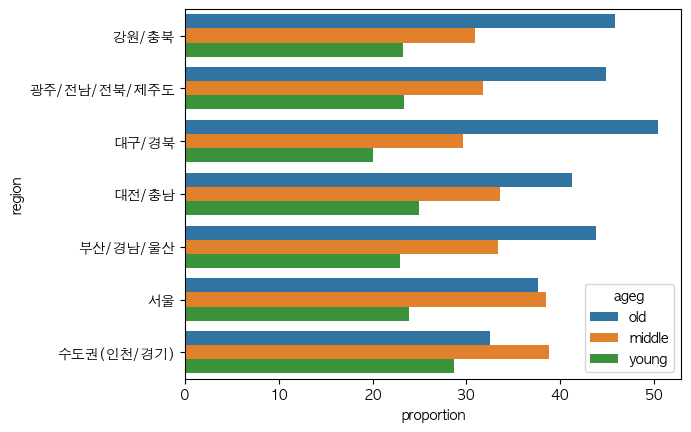

In [95]:
# 막대 그래프 만들기
sns.barplot(data=region_ageg, x="proportion", y="region", hue="ageg")

In [96]:
# 누적 비율 막대 그래프 만들기
# 피벗하기

pivot_df = region_ageg[["region", "ageg", "proportion"]].pivot(
    index="region", columns="ageg", values="proportion"
)

pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<Axes: ylabel='region'>

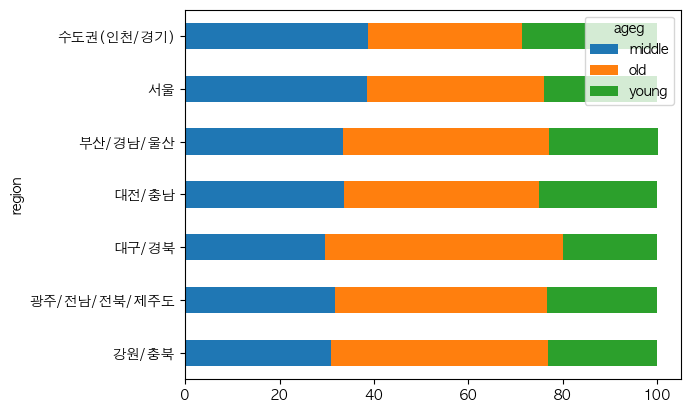

In [97]:
pivot_df.plot.barh(stacked=True)

In [98]:
# 막대 정렬하기
reorder_df = pivot_df.sort_values("old")[["young", "middle", "old"]]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

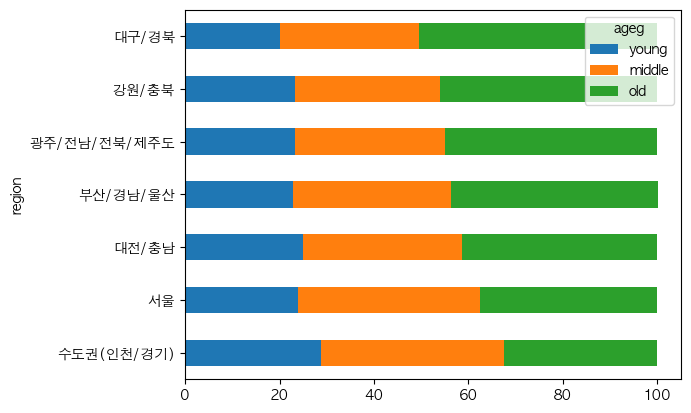

In [99]:
reorder_df.plot.barh(stacked=True)